<a href="https://colab.research.google.com/github/Yucheol-Son-BYUI/CSE310_W0_HelloWorld/blob/main/notebooks/starter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
df = campaign.copy(deep=False)
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [28]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.025493,2.564407,962.221803,0.173730,0.081526,93.576551,-40.494829,3.621945,5167.010650
std,10.435288,2.764084,187.531477,0.496159,1.572287,0.579339,4.628895,1.734496,72.294476
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [29]:
df.describe(exclude='number')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,37069,37069,37069,37069,37069,37069,37069,37069,37069,37069,37069
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,9400,22456,10949,29341,19474,30590,23515,12370,7742,31988,32861


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  campaign        37069 non-null  int64  
 11  pdays           37069 non-null  int64  
 12  previous        37069 non-null  int64  
 13  poutcome        37069 non-null  object 
 14  emp.var.rate    37069 non-null  float64
 15  cons.price.idx  37069 non-null  float64
 16  cons.conf.idx   37069 non-null  float64
 17  euribor3m       37069 non-null 

1. Since 88% of our target labels are 'no,' we're dealing with a class imbalance. We should prioritize the F1-score over Accuracy.

2. At least 75% of the pdays values are '999.' This definitely needs special handling since it's a placeholder, not a literal number.

3. Should we clip the outliers in the campaign column, like that maximum value of 56?

4. The default column is overwhelmingly 'no' (29,341 cases). We need to figure out if it even provides enough information for the model.

5. We should normalize our quantitative features, especially if we're planning to use distance-based models.

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score

# 1. Apply One-Hot Encoding to all categorical columns
df_encoded = pd.get_dummies(df.drop('pdays', axis=1), drop_first=True)

# 2. Split Features and Target
X = df_encoded.drop(['y_yes'], axis=1) # Target becomes y_yes after get_dummies
y = df_encoded['y_yes']

# Now you can proceed with train_test_split and model.fit()

# 2. Train/Test Split (Maintaining the 80/20 ratio and stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X_no_pdays, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Initialize the Model with 'class_weight'
# 'balanced' automatically adjusts weights inversely proportional to class frequencies
model_v2 = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')
model_v2.fit(X_train, y_train)

# 4. Evaluate
y_pred_v2 = model_v2.predict(X_test)

print("--- Prototype V2 (No pdays + Balanced Weight) ---")
print(f"F1 Score: {f1_score(y_test, y_pred_v2):.4f}")
print("\nFull Report:")
print(classification_report(y_test, y_pred_v2))

--- Prototype V2 (No pdays + Balanced Weight) ---
F1 Score: 0.4860

Full Report:
              precision    recall  f1-score   support

       False       0.95      0.89      0.92      6572
        True       0.41      0.60      0.49       842

    accuracy                           0.86      7414
   macro avg       0.68      0.74      0.70      7414
weighted avg       0.88      0.86      0.87      7414



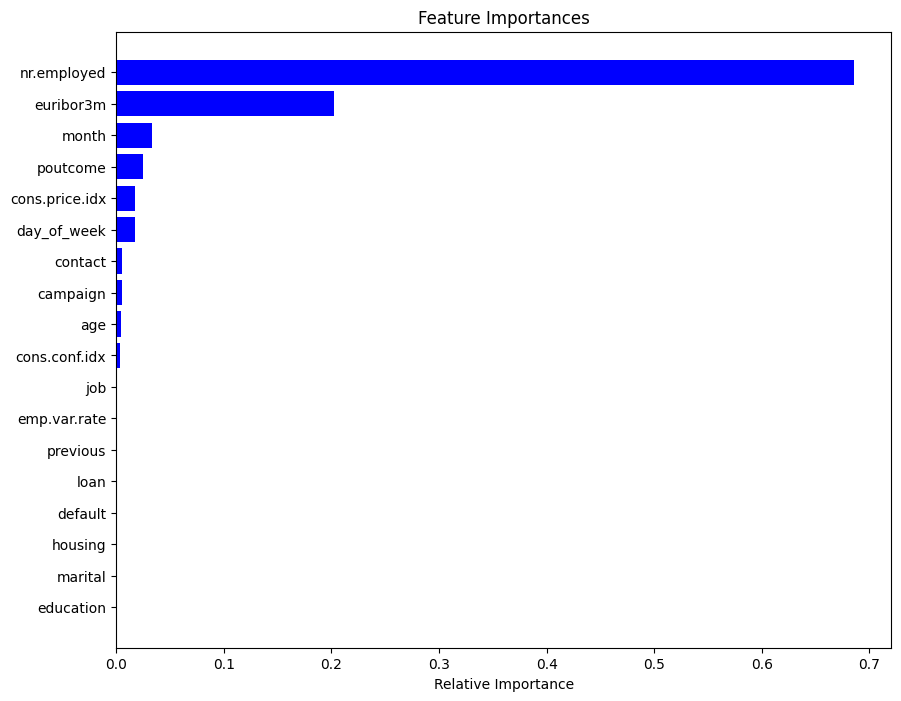

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Get feature names and their importance scores
features = X_train.columns
importances = model_v2.feature_importances_

# 2. Sort them in descending order
indices = np.argsort(importances)

# 3. Plotting
plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()